In [1]:
%matplotlib inline

In [2]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

## Energy Based Novelty Function

In [8]:
x, sr = librosa.load('audio/bones.mp3', duration=80)
print(x.shape, sr)

(1764000,) 22050


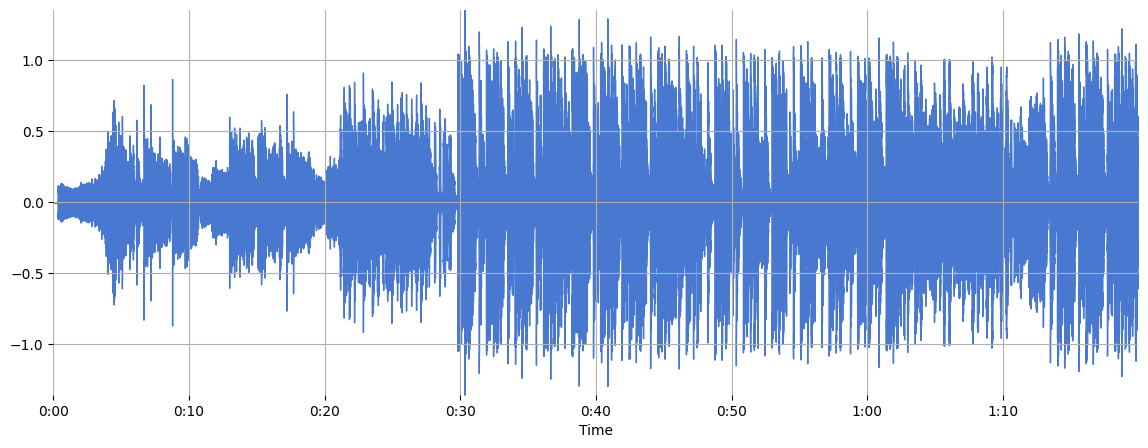

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x)

In [34]:
def rmse_energy_plot(x):
    hop_length = 512
    frame_length = 1024
    rmse = librosa.feature.rms(y=x, frame_length=frame_length, hop_length=hop_length).flatten()
    rmse_diff = numpy.zeros_like(rmse)
    rmse_diff[1:] = numpy.diff(rmse)

    energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)

    frames = numpy.arange(len(rmse))
    t = librosa.frames_to_time(frames, sr=sr)

    plt.figure(figsize=(15, 6))
    plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
    plt.xlim(0, t.max())
    plt.xlabel('Time (sec)')
    plt.legend(('RMSE', 'delta RMSE', 'energy novelty')) 
    plt.show()

In [11]:
hop_length = 512
frame_length = 1024
rmse = librosa.feature.rms(y=x, frame_length=frame_length, hop_length=hop_length).flatten()
rmse_diff = numpy.zeros_like(rmse)
rmse_diff[1:] = numpy.diff(rmse)

In [12]:
print(rmse.shape)
print(rmse_diff.shape)

(3446,)
(3446,)


In [13]:
energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)

In [14]:
frames = numpy.arange(len(rmse))
t = librosa.frames_to_time(frames, sr=sr)

#### Energy Novelty through RMSE

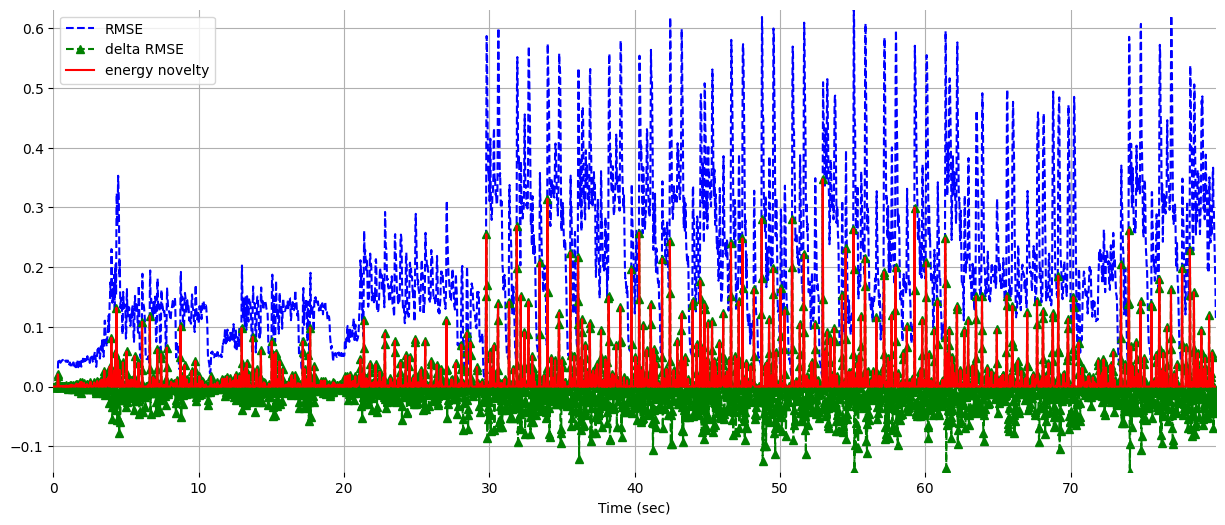

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('RMSE', 'delta RMSE', 'energy novelty')) 

#### Some drawbacks of the energy based Method
- It is overly sensitive to energy fluctuations to the same note
- Does not account well for spectral change in notes if the amplitude remains the same

In [17]:
def spectral_energy_plot(x):
    spectral_novelty = librosa.onset.onset_strength(y=x, sr=sr)

    frames = numpy.arange(len(spectral_novelty))
    t = librosa.frames_to_time(frames, sr=sr)

    plt.figure(figsize=(15, 4))
    plt.plot(t, spectral_novelty, 'r-')
    plt.xlim(0, t.max())
    plt.xlabel('Time (sec)')
    plt.legend(('Spectral Novelty',))
    plt.show()

In [18]:
spectral_novelty = librosa.onset.onset_strength(y=x, sr=sr)

In [19]:
frames = numpy.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=sr)

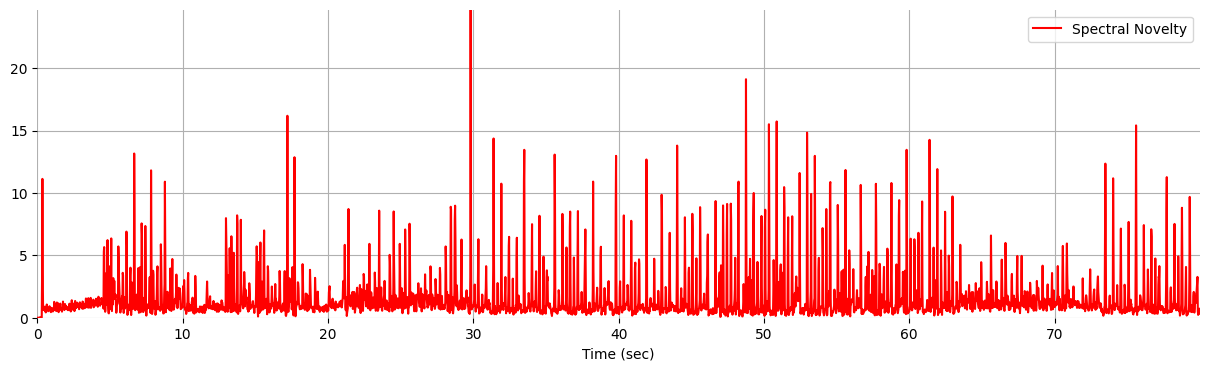

In [20]:
plt.figure(figsize=(15, 4))
plt.plot(t, spectral_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Spectral Novelty',))

### Say So - Doja Cat

In [27]:
x, sr = librosa.load('audio/say_so.mp3')
print(x.shape, sr)

(5171969,) 22050


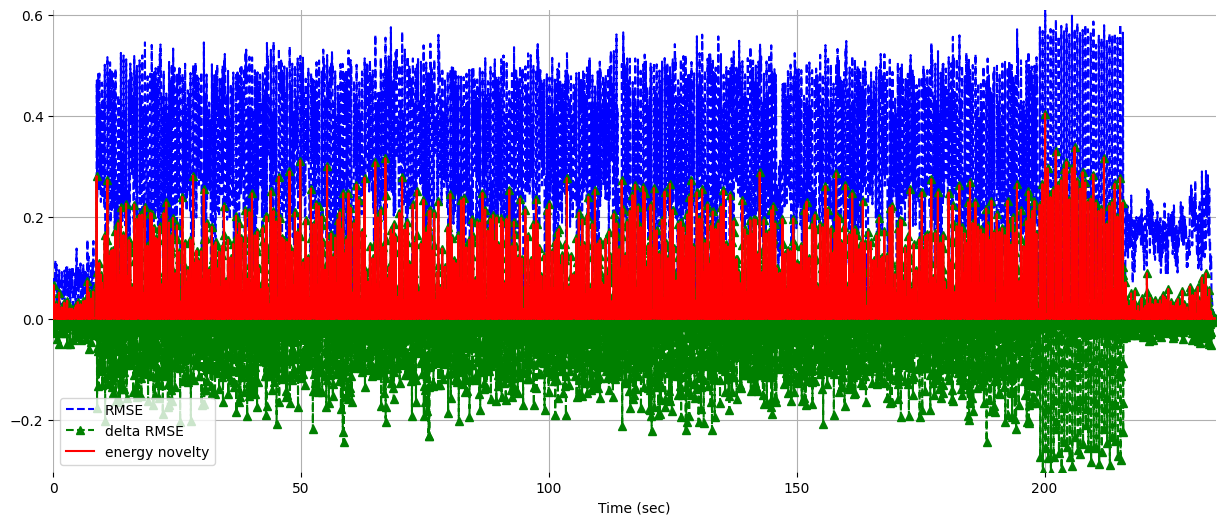

In [28]:
rmse_energy_plot(x)

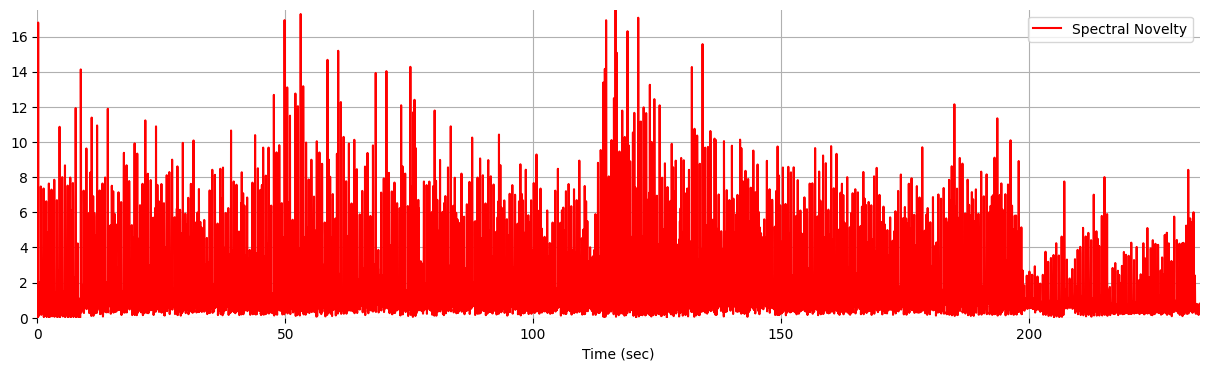

In [29]:
spectral_energy_plot(x)

### Gimme More - Britney Spears

In [30]:
x, sr = librosa.load('audio/gimme_more.mp3')
print(x.shape, sr)

(5492224,) 22050


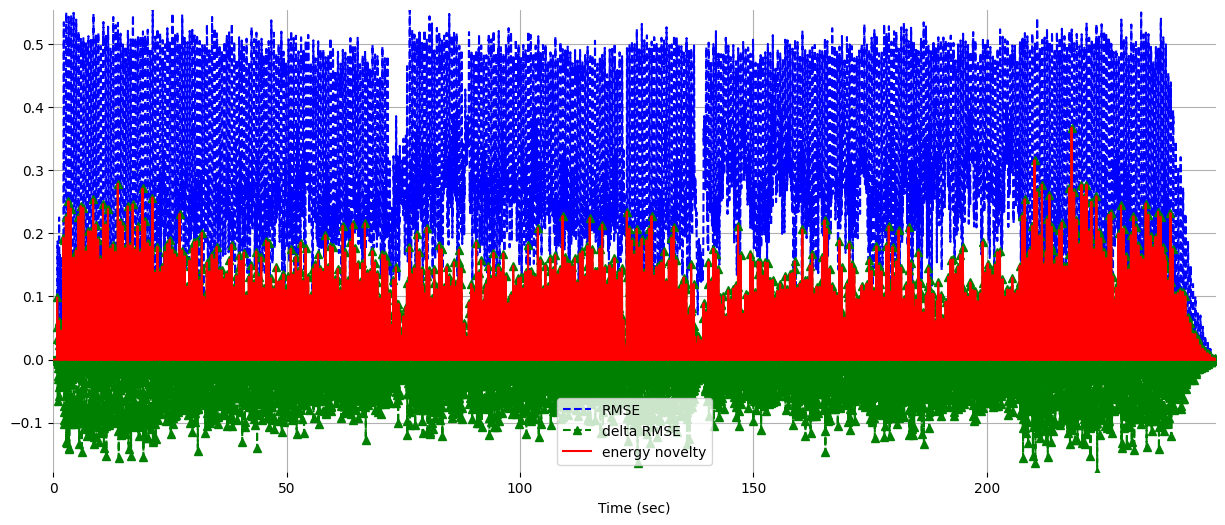

In [31]:
rmse_energy_plot(x)

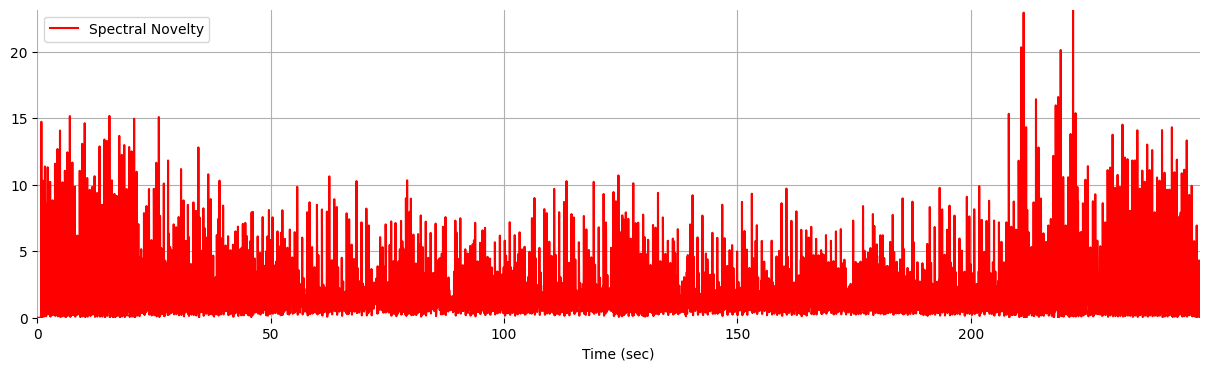

In [32]:
spectral_energy_plot(x)

### Sweater Weather

In [22]:
x, sr = librosa.load('audio/sweater_weather.mp3', duration=100)
print(x.shape, sr)

(2205000,) 22050


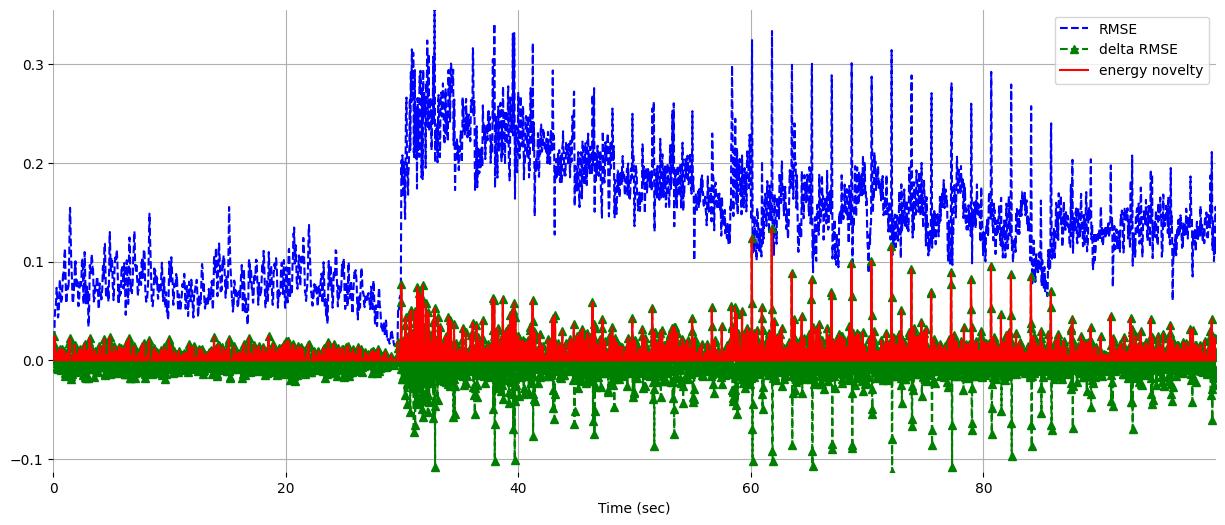

In [23]:
rmse_energy_plot(x)

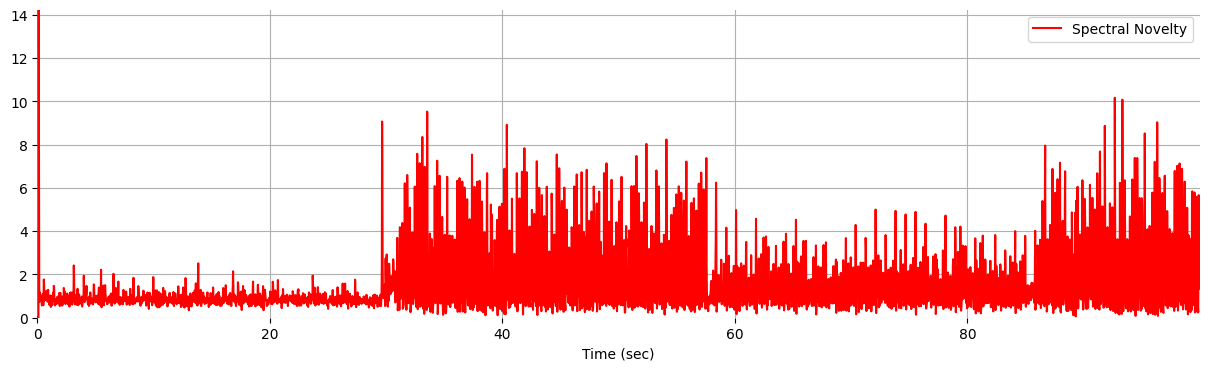

In [24]:
spectral_energy_plot(x)

### Lalala

In [31]:
x, sr = librosa.load('audio/lalala.mp3', duration=100)
print(x.shape, sr)

(2205000,) 22050


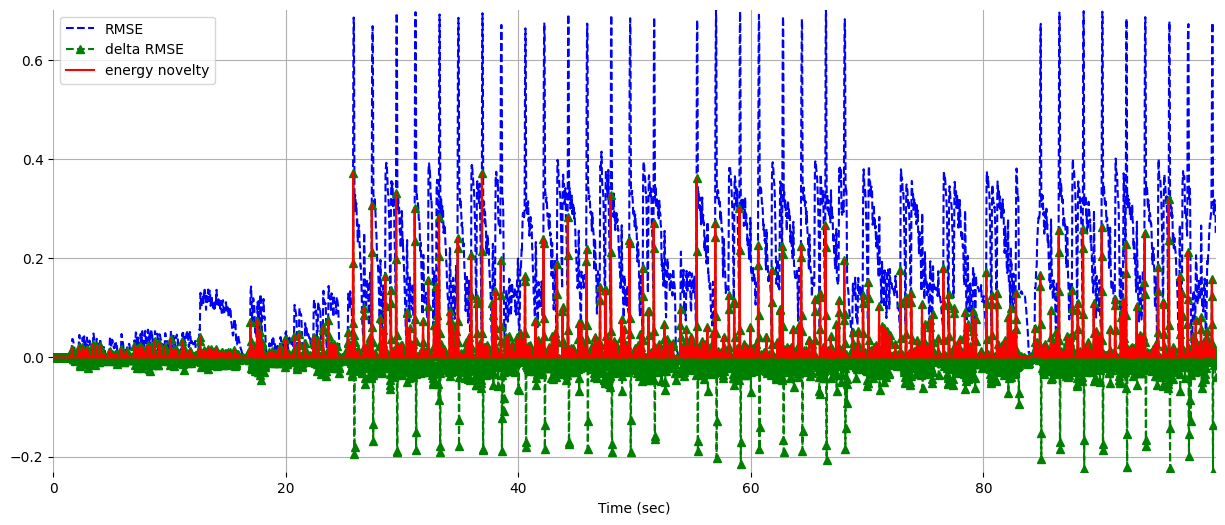

In [35]:
rmse_energy_plot(x)

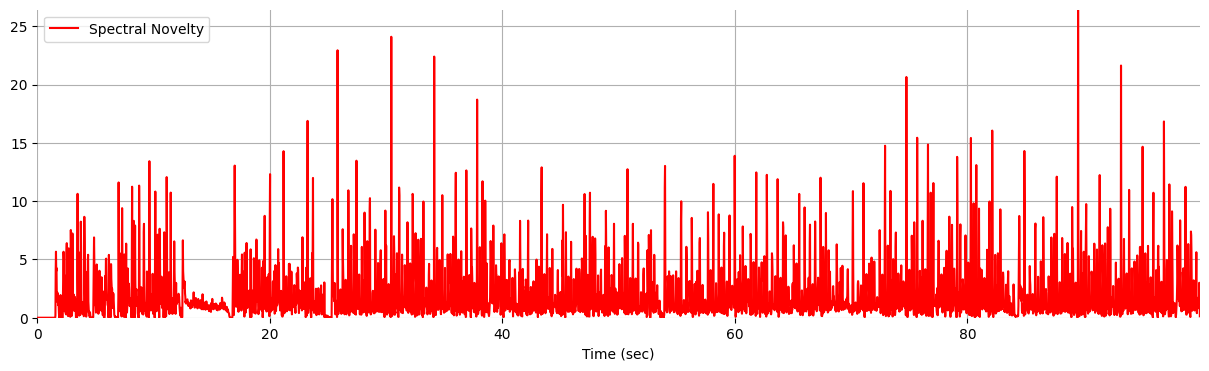

In [36]:
spectral_energy_plot(x)

### Snowman

In [53]:
x, sr = librosa.load('audio/say_so.mp3', duration=200)
print(x.shape, sr)

(4410000,) 22050


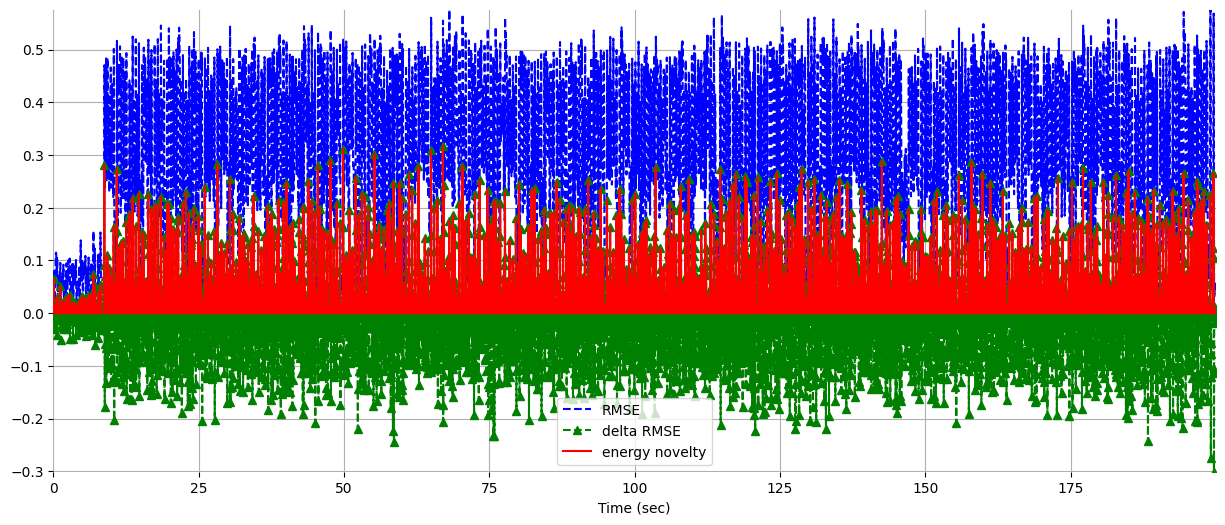

In [56]:
rmse_energy_plot(x)

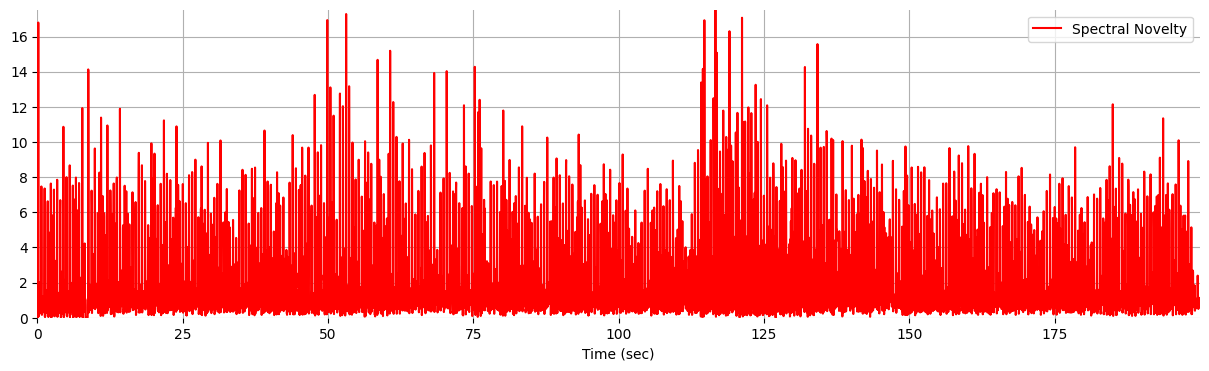

In [55]:
spectral_energy_plot(x)